In [1]:
import sys
import yaml
import matplotlib.pyplot as plt
import matplotlib

In [2]:
path = "/home/vahid/Dropbox/data/swarm-manager-data/results/300_80_0.3_10/cpu_util_rule_based/cpu90_50.yml"
with open(path) as f:
    __data = yaml.load(f, Loader=yaml.FullLoader)

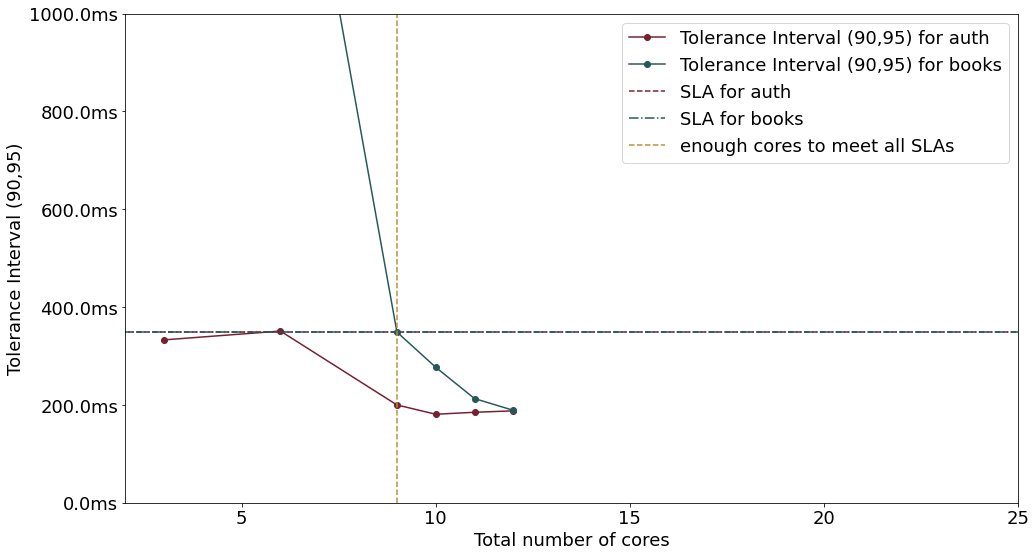

In [9]:
colors = ['#77202F','#255958', '#BA9238', '#7E7D88']
matplotlib.rcParams.update({'font.size': 18})
def draw(data, key_name, services, ax, SLAs,with_legend):    
    enough_cores = 1000000
    y_label = None
    if key_name == "rt_ti_u_bound_c90_p95":
        y_label = "Tolerance Interval (90,95)"
    else:
        assert False
    y_values = {}
    for service in services:
        y_values[service] = []
    x_values = []
    for config in data['configs']:
        meets_sla = True
        for service_idx, service in enumerate(services):
            y_values[service].append(config['info'][service][key_name])
            meets_sla = config['info'][service][key_name] < SLAs[service_idx] and meets_sla
        total_cpu_count = config['specs']['auth']['replicaCount'] * config['specs']['auth']['CPULimits'] + config['specs']['books']['replicaCount'] * config['specs']['books']['CPULimits'] + config['specs']['gateway']['replicaCount'] * config['specs']['gateway']['CPULimits']
        if meets_sla:
            enough_cores = min(enough_cores, total_cpu_count)
        
        x_values.append(total_cpu_count)
    for idx, service_name in enumerate(y_values):
        ax.plot(x_values, y_values[service_name], '-o', color=colors[idx], label=y_label + ' for ' + service_name)
    
    ax.set_xlim(min(x_values)-1, 25)
    ax.set_ylim(0, 1000)
    ax.set_xlabel("Total number of cores")
    ax.set_ylabel(y_label)
    ax.set_yticklabels([str(y) + 'ms' for y in ax.get_yticks()])
    for idx, sla in enumerate(SLAs):
        ax.plot([-1,25],[sla,sla], '--' if idx == 0 else '-.', label='SLA for ' + services[idx], color=colors[idx])
    
    ax.plot([enough_cores,enough_cores],[0,1000], '--', color=colors[2], label='enough cores to meet all SLAs')
    if with_legend:
        ax.legend()
fig, (ax1) = plt.subplots(1, 1, figsize=(16,9))
draw(__data, "rt_ti_u_bound_c90_p95", ["auth","books"], ax1, [350,350], with_legend=True)
plt.show()

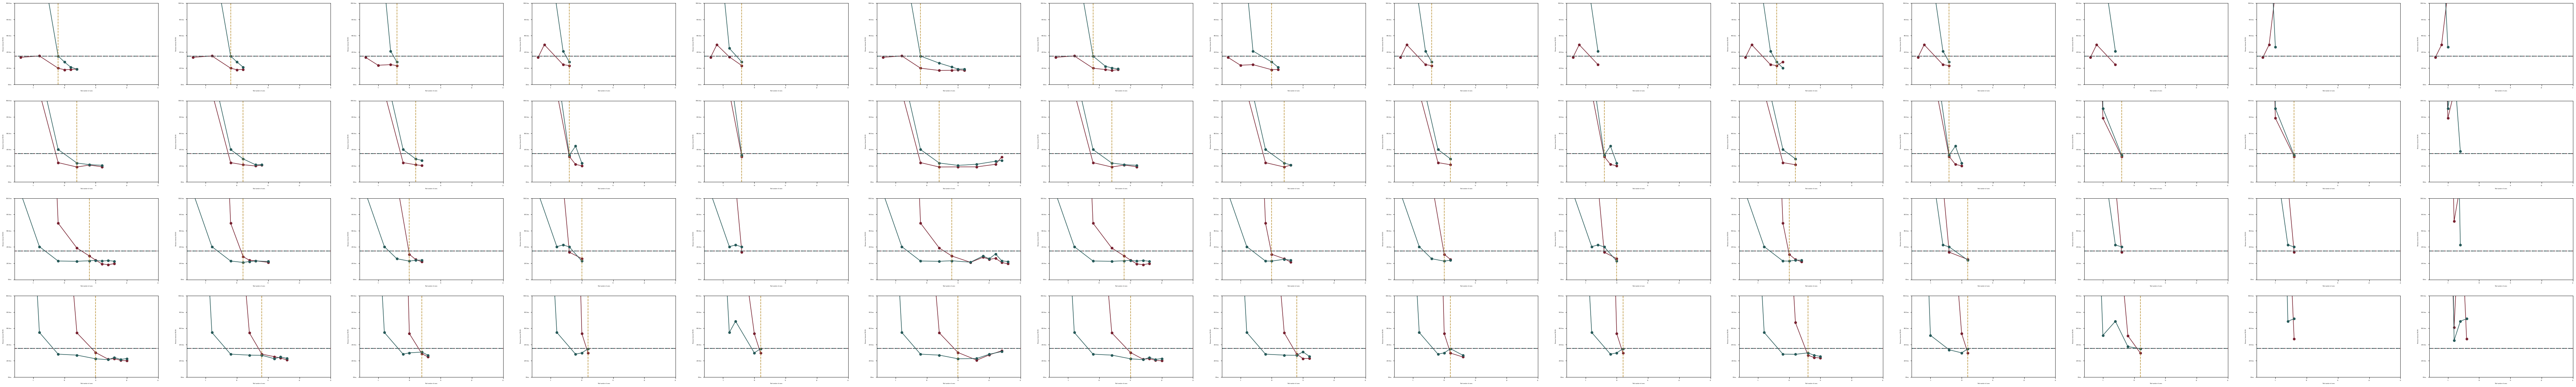

In [19]:
fig, axes = plt.subplots(4, 15, figsize=(15*8,4*4.5))
dir_path = "/home/vahid/Dropbox/data/swarm-manager-data/results/WORKLOAD/cpu_util_rule_based"
rules = ['cpu90_50.yml','cpu90_60.yml','cpu90_70.yml','cpu90_80.yml','cpu90_90.yml','cpu95_50.yml','cpu95_60.yml','cpu95_70.yml','cpu95_80.yml','cpu95_90.yml','cpu_mean_50.yml','cpu_mean_60.yml','cpu_mean_70.yml','cpu_mean_80.yml','cpu_mean_90.yml']
workloads = ["300_80_0.3_10","400_80_0.5_10","420_80_0.7_10","500_80_0.65_10"]

matplotlib.rcParams.update({'font.size': 16})
i = 0
for workload in workloads:
    base_path = dir_path.replace("WORKLOAD", workload)
    j = 0
    for rule_name in rules:
        path = base_path + "/" + rule_name
        with open(path) as f:
            __data = yaml.load(f, Loader=yaml.FullLoader)
            draw(__data, "rt_ti_u_bound_c90_p95", ["auth","books"], axes[i,j], [350,350], with_legend=False)
        j += 1
    i += 1
plt.show()